<a href="https://colab.research.google.com/github/tcglarry/project_SDP/blob/master/file_preprocess_ng_ok_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Make directory and prepare image files
## Create a new dataset (no overwrite)
## Create directory 
## OK NG
## copy all ng in OK
## copy all ok files in OK

In [5]:

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [10]:
!ls 'drive/My Drive/project_sdp/'

dataset
file_preprocess.ipynb
file_preprocess_ng_ok_generator.ipynb
final_dir_files.pkl
resnet.py
stage_1_DenseNet_169_binary_classfier_generator_backup_retrain.ipynb
stage_1_ResNet_TAO_binary_classfier_112.ipynb
Untitled0.ipynb


In [0]:
src = 'drive/My Drive/project_sdp/'

In [0]:
import os
import numpy as np
import pickle
%matplotlib inline
import shutil

In [13]:

'''
final_dir: list conatns all the string name of end  dircetory 
final_dir_files: a dict contains mapping of mapping: element in final_dir mapping to the fiel list 
'''

final_dir =[]
final_dir_files ={}
for i in range (9):
    
    chosen_path = (src+'/dataset/ARY_ADJ/'+str(i))
    #chosen_path = ('/dataset/'+str(i)+'/')
    #print (chosen_path)

    for root, dirs, files in os.walk(chosen_path, topdown=True):
        if not dirs:
            final_dir.append(root)
            final_dir_files[root] = os.listdir(root)

print(final_dir)

['drive/My Drive/project_sdp//dataset/ARY_ADJ/0/NG/AI', 'drive/My Drive/project_sdp//dataset/ARY_ADJ/0/OK/AI', 'drive/My Drive/project_sdp//dataset/ARY_ADJ/1/NG/AI', 'drive/My Drive/project_sdp//dataset/ARY_ADJ/1/OK/AI', 'drive/My Drive/project_sdp//dataset/ARY_ADJ/2/NG/AI', 'drive/My Drive/project_sdp//dataset/ARY_ADJ/3/NG/AI', 'drive/My Drive/project_sdp//dataset/ARY_ADJ/3/OK/AI', 'drive/My Drive/project_sdp//dataset/ARY_ADJ/4/AI', 'drive/My Drive/project_sdp//dataset/ARY_ADJ/5/AI', 'drive/My Drive/project_sdp//dataset/ARY_ADJ/6/OK Artificial/AI', 'drive/My Drive/project_sdp//dataset/ARY_ADJ/6/OK Natural/AI', 'drive/My Drive/project_sdp//dataset/ARY_ADJ/7/OK/AI', 'drive/My Drive/project_sdp//dataset/ARY_ADJ/7/NG/AI', 'drive/My Drive/project_sdp//dataset/ARY_ADJ/8/OK/AI']


In [14]:
# check files that are not images, if yes, erase them
for key in final_dir_files.keys():
    
    print (key, '\t', len(final_dir_files[key]))
    not_jpg = [f for f in final_dir_files[key] if f[-4:] !='.jpg']
    final_dir_files[key] = [f for f in final_dir_files[key] if f not in not_jpg]


drive/My Drive/project_sdp//dataset/ARY_ADJ/0/NG/AI 	 192
drive/My Drive/project_sdp//dataset/ARY_ADJ/0/OK/AI 	 171
drive/My Drive/project_sdp//dataset/ARY_ADJ/1/NG/AI 	 423
drive/My Drive/project_sdp//dataset/ARY_ADJ/1/OK/AI 	 404
drive/My Drive/project_sdp//dataset/ARY_ADJ/2/NG/AI 	 173
drive/My Drive/project_sdp//dataset/ARY_ADJ/3/NG/AI 	 109
drive/My Drive/project_sdp//dataset/ARY_ADJ/3/OK/AI 	 301
drive/My Drive/project_sdp//dataset/ARY_ADJ/4/AI 	 311
drive/My Drive/project_sdp//dataset/ARY_ADJ/5/AI 	 409
drive/My Drive/project_sdp//dataset/ARY_ADJ/6/OK Artificial/AI 	 274
drive/My Drive/project_sdp//dataset/ARY_ADJ/6/OK Natural/AI 	 135
drive/My Drive/project_sdp//dataset/ARY_ADJ/7/OK/AI 	 418
drive/My Drive/project_sdp//dataset/ARY_ADJ/7/NG/AI 	 258
drive/My Drive/project_sdp//dataset/ARY_ADJ/8/OK/AI 	 253


In [0]:
'''
with open('final_dir_files.pkl','wb') as handle:
    pickle.dump(final_dir_files,handle)
'''    

"\nwith open('final_dir_files.pkl','wb') as handle:\n    pickle.dump(final_dir_files,handle)\n"

In [15]:
ok_dir = [f for f in final_dir if 'OK' in f ]
print (ok_dir)
ng_dir = [f for f in final_dir if f not in ok_dir]
print (ng_dir)

# making prefix, example: 0_NG_, 1_ok,..
ng_prefix = {}
for f in ng_dir:
    ng_prefix[f] = f[18:19] + '_NG_'
print ('\n')    
print(ng_prefix)

ok_prefix = {}
for f in ok_dir:
    ok_prefix[f] = f[18:19] + '_OK_'
print ('\n')   
print (ok_prefix)

['drive/My Drive/project_sdp//dataset/ARY_ADJ/0/OK/AI', 'drive/My Drive/project_sdp//dataset/ARY_ADJ/1/OK/AI', 'drive/My Drive/project_sdp//dataset/ARY_ADJ/3/OK/AI', 'drive/My Drive/project_sdp//dataset/ARY_ADJ/6/OK Artificial/AI', 'drive/My Drive/project_sdp//dataset/ARY_ADJ/6/OK Natural/AI', 'drive/My Drive/project_sdp//dataset/ARY_ADJ/7/OK/AI', 'drive/My Drive/project_sdp//dataset/ARY_ADJ/8/OK/AI']
['drive/My Drive/project_sdp//dataset/ARY_ADJ/0/NG/AI', 'drive/My Drive/project_sdp//dataset/ARY_ADJ/1/NG/AI', 'drive/My Drive/project_sdp//dataset/ARY_ADJ/2/NG/AI', 'drive/My Drive/project_sdp//dataset/ARY_ADJ/3/NG/AI', 'drive/My Drive/project_sdp//dataset/ARY_ADJ/4/AI', 'drive/My Drive/project_sdp//dataset/ARY_ADJ/5/AI', 'drive/My Drive/project_sdp//dataset/ARY_ADJ/7/NG/AI']


{'drive/My Drive/project_sdp//dataset/ARY_ADJ/0/NG/AI': 'j_NG_', 'drive/My Drive/project_sdp//dataset/ARY_ADJ/1/NG/AI': 'j_NG_', 'drive/My Drive/project_sdp//dataset/ARY_ADJ/2/NG/AI': 'j_NG_', 'drive/My Drive/proj

In [17]:
'''
Create new dataset: not to overwrte for those existed
new dataset: 'dataset' + 'n', eg dataset3 
crate first layer folder: OK, NG 
create second layer folder: train, validation 
in tran and validation folder, create folder '0','1','2','3','4','5','7'
'''
cwd = os.getcwd()
print(cwd)
make_new_dir = True

first_layer  = ['train','validation']
second_layer = ['OK','NG']

# create datasetn cehck whther datasetn exists, if, yes, check datasetn+1 

for i in np.arange(2,10):
    if not os.path.exists(src+'dataset'+str(i)):
        new_dir_name = src+'dataset'+str(i)
        break
        
print ('new_dir_name=',new_dir_name)
if make_new_dir: 
        os.makedirs(new_dir_name)
os.chdir('./'+new_dir_name)
for dir in first_layer:
    os.makedirs(dir)

    os.chdir('./'+dir)
    print('**', os.getcwd())
    for dir2 in second_layer:
        os.makedirs(dir2)
    os.chdir(cwd)
    print(os.getcwd())
    os.chdir('./'+new_dir_name)
    print(os.getcwd())


os.chdir(cwd)
print(os.getcwd())


/content
new_dir_name= drive/My Drive/project_sdp/dataset3
** /content/drive/My Drive/project_sdp/dataset3/train
/content
/content/drive/My Drive/project_sdp/dataset3
** /content/drive/My Drive/project_sdp/dataset3/validation
/content
/content/drive/My Drive/project_sdp/dataset3
/content


In [0]:
'''
copy files to new dataset
src dircetory= './dataset/ARY_ADJ/'
target directory = './'+new_dir_name
file split: train and validation  (0.7 vs 0.3)
file name: add prefix, eg.: '0_NG', '1_NG' or '0_OK', '1_OK' 
'''
import shutil

def copy_files(prefix, root, file_list, t_dir):
    print (t_dir)
    for f in file_list:
        shutil.copy(os.path.join(root+'/'+f), t_dir+prefix+f)
        #print (t_dir+prefix+f)
        


In [0]:
def split_files(file_list, split=0.7):
    split_number = int(len(file_list)*split)
    select_list = np.random.choice(len(file_list),split_number,replace=False).tolist()
    print ('select_list', len(select_list))
    
    select_list.sort()
    un_select_list = [i for i in range(len(file_list)) if i not in select_list]
    print ('un_select_list', len(un_select_list))
    #print (len(file_list),len(select_list))
    train = [file_list[i] for i in select_list ]
    validation = [f for f in file_list if  f not in train]
    
    print ('len of file_list', len(file_list), 'len of train', len(train), 'len of validation', len(validation))
    
    return train, validation

In [20]:

# copy ng files into the same directory !!


for key in ng_dir:
    
    #print (key)
    target_src_train =      './'+new_dir_name + '/train/NG/'
    target_src_validation = './'+new_dir_name + '/validation/NG/'
    prefix = ng_prefix[key]
    train_list,val_list = split_files(final_dir_files[key])
    #print (len(val_list))
    copy_files(prefix, key,train_list ,target_src_train)

    copy_files(prefix, key,val_list,target_src_validation)
    
    print ('NG files making completed')





select_list 133
un_select_list 58
len of file_list 191 len of train 133 len of validation 58
./drive/My Drive/project_sdp/dataset3/train/NG/
./drive/My Drive/project_sdp/dataset3/validation/NG/
NG files making completed
select_list 295
un_select_list 127
len of file_list 422 len of train 295 len of validation 127
./drive/My Drive/project_sdp/dataset3/train/NG/
./drive/My Drive/project_sdp/dataset3/validation/NG/
NG files making completed
select_list 120
un_select_list 52
len of file_list 172 len of train 120 len of validation 52
./drive/My Drive/project_sdp/dataset3/train/NG/
./drive/My Drive/project_sdp/dataset3/validation/NG/
NG files making completed
select_list 75
un_select_list 33
len of file_list 108 len of train 75 len of validation 33
./drive/My Drive/project_sdp/dataset3/train/NG/
./drive/My Drive/project_sdp/dataset3/validation/NG/
NG files making completed
select_list 217
un_select_list 93
len of file_list 310 len of train 217 len of validation 93
./drive/My Drive/project_sd

In [21]:


# copy ok files 


# copy ng files into the same directory !!


for key in ok_dir:
    
    #print (key)
    target_src_train =      './'+new_dir_name + '/train/OK/'
    target_src_validation = './'+new_dir_name + '/validation/OK/'
    prefix = ok_prefix[key]
    train_list,val_list = split_files(final_dir_files[key])
    #print (len(val_list))
    copy_files(prefix, key,train_list ,target_src_train)

    copy_files(prefix, key,val_list,target_src_validation)
    
    print ('ok files making completed')




select_list 118
un_select_list 52
len of file_list 170 len of train 118 len of validation 52
./drive/My Drive/project_sdp/dataset3/train/OK/
./drive/My Drive/project_sdp/dataset3/validation/OK/
ok files making completed
select_list 282
un_select_list 121
len of file_list 403 len of train 282 len of validation 121
./drive/My Drive/project_sdp/dataset3/train/OK/
./drive/My Drive/project_sdp/dataset3/validation/OK/
ok files making completed
select_list 210
un_select_list 90
len of file_list 300 len of train 210 len of validation 90
./drive/My Drive/project_sdp/dataset3/train/OK/
./drive/My Drive/project_sdp/dataset3/validation/OK/
ok files making completed
select_list 191
un_select_list 82
len of file_list 273 len of train 191 len of validation 82
./drive/My Drive/project_sdp/dataset3/train/OK/
./drive/My Drive/project_sdp/dataset3/validation/OK/
ok files making completed
select_list 93
un_select_list 41
len of file_list 134 len of train 93 len of validation 41
./drive/My Drive/project_sd

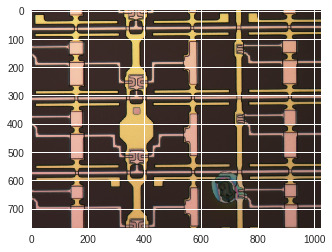

In [22]:

img = final_dir_files[ng_dir[0]][0]

import matplotlib.pyplot as plt 
im = plt.imread(ng_dir[0]+'/'+img)
plt.imshow(im)